In [1]:
import pandas
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import DateOffset


In [2]:
stockPrices = pandas.read_csv('SNP/SNP 500  - Sheet2.csv')
snpStocks = pandas.read_csv('SNP/SNP Companies.csv')
snpFT = pandas.read_csv('snp_nlp2.csv')

In [3]:
snpFT = snpFT.merge(snpStocks[['Name', 'Symbol']], left_on='Stock', right_on='Name')
snpFT = snpFT.drop(['Name'], axis=1)

In [4]:
snpFT = snpFT[[
    'Date',
    'Link',
    'Title + Subtitle',
    'Stock',
    'Symbol',
    'Authors',
    'Pos',
    'Neg',
    'Neutr'
]]

In [5]:
snpFT['Date'] = pandas.to_datetime(snpFT['Date']).dt.to_period('M')
stockPrices['Date'] = pandas.to_datetime(stockPrices['Date']).dt.to_period('M')

In [6]:
snpFT

,Date,Link,Title + Subtitle,Stock,Symbol,Authors,Pos,Neg,Neutr
0,2022-11,https://www.ft.com/content/e9098953-e031-4bc5-...,Were we wrong about big tech? Taking growth fo...,Apple Inc.,AAPL,['Robert Armstrong'],0.050251,0.058437,0.891312
1,2022-11,https://www.ft.com/content/2e9cd061-99c3-4638-...,Apple warns of iPhone shipment delays in wake ...,Apple Inc.,AAPL,"['Ryan McMorrow', 'Nian Liu', 'Patrick McGee',...",0.010275,0.965538,0.024187
2,2022-11,https://www.ft.com/content/cc3b4a5a-af35-41d5-...,"China’s closed-loop crisis: ‘I’m human, not a ...",Apple Inc.,AAPL,"['Edward White', 'Qianer Liu']",0.044839,0.773122,0.182038
3,2022-10,https://www.ft.com/content/7df7443c-226b-455a-...,Workers flee Covid restrictions at China’s lar...,Apple Inc.,AAPL,"['Gloria Li', 'Ryan McMorrow']",0.029888,0.909527,0.060584
4,2022-10,https://www.ft.com/content/fa6bec83-058f-4991-...,Apple says it is facing ‘significant’ headwind...,Apple Inc.,AAPL,['Patrick McGee'],0.023468,0.954813,0.021720
...,...,...,...,...,...,...,...,...,...
6885,2016-07,https://www.ft.com/content/b7296c10-4ac0-11e6-...,"From rock stars to roadies, all change for Wal...",Netflix Inc.,NFLX,['Nicole Bullock'],0.036862,0.029603,0.933535
6886,2016-07,https://www.ft.com/content/bf22baf6-3fa4-11e6-...,Wall Street enjoys best week since late-2015 a...,Netflix Inc.,NFLX,['Gregory Meyer'],0.885330,0.041873,0.072797
6887,2016-06,https://www.ft.com/content/bc52a558-36de-11e6-...,The office is dead! Long live the office! Tech...,Netflix Inc.,NFLX,['Alison Maitland'],0.039384,0.179470,0.781146
6888,2016-06,https://www.ft.com/content/17856f62-360f-11e6-...,Pay transparency is the last taboo in business...,Netflix Inc.,NFLX,['Andrew Hill'],0.016312,0.760250,0.223438


In [7]:
atTimeStockPrice = []
oneMonthStockPrice = []
threeMonthStockPrice = []
sixMonthStockPrice = []

for i in range(len(snpFT)):
    date = snpFT['Date'][i]
    stock = snpFT['Symbol'][i]
    stockExists1Month = False
    stockExists3Months = False
    stockExists6Months = False
    for i in range(len(stockPrices)):
        if stockPrices['Date'][i] == date:
            atTimeStockPrice.append(stockPrices[stock][i])
        if stockPrices['Date'][i] - 1 == date:
            oneMonthStockPrice.append(stockPrices[stock][i])
            stockExists1Month = True
        if stockPrices['Date'][i] - 3 == date:
            threeMonthStockPrice.append(stockPrices[stock][i])
            stockExists3Months = True
        if stockPrices['Date'][i] - 6 == date:
            sixMonthStockPrice.append(stockPrices[stock][i])
            stockExists6Months = True
    if stockExists1Month == False:
        oneMonthStockPrice.append(None)
    if stockExists3Months == False:
        threeMonthStockPrice.append(None)
    if stockExists6Months == False:
        sixMonthStockPrice.append(None)
snpFT['Stock Price'] = atTimeStockPrice
snpFT['1 Month SP'] = oneMonthStockPrice
snpFT['3 Month SP'] = threeMonthStockPrice
snpFT['6 Month SP'] = sixMonthStockPrice

snpFT['1 Month SP%'] = (snpFT['1 Month SP'] - snpFT['Stock Price']) / snpFT['Stock Price']
snpFT['3 Month SP%'] = (snpFT['3 Month SP'] - snpFT['Stock Price']) / snpFT['Stock Price']
snpFT['6 Month SP%'] = (snpFT['6 Month SP'] - snpFT['Stock Price']) / snpFT['Stock Price']

In [8]:
snpFT['1 Month SP%'] = (snpFT['1 Month SP'] - snpFT['Stock Price']) / snpFT['Stock Price']
snpFT['3 Month SP%'] = (snpFT['3 Month SP'] - snpFT['Stock Price']) / snpFT['Stock Price']
snpFT['6 Month SP%'] = (snpFT['6 Month SP'] - snpFT['Stock Price']) / snpFT['Stock Price']

In [9]:
snpFT

,Date,Link,Title + Subtitle,Stock,Symbol,Authors,Pos,Neg,Neutr,Stock Price,1 Month SP,3 Month SP,6 Month SP,1 Month SP%,3 Month SP%,6 Month SP%
0,2022-11,https://www.ft.com/content/e9098953-e031-4bc5-...,Were we wrong about big tech? Taking growth fo...,Apple Inc.,AAPL,['Robert Armstrong'],0.050251,0.058437,0.891312,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN
1,2022-11,https://www.ft.com/content/2e9cd061-99c3-4638-...,Apple warns of iPhone shipment delays in wake ...,Apple Inc.,AAPL,"['Ryan McMorrow', 'Nian Liu', 'Patrick McGee',...",0.010275,0.965538,0.024187,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN
2,2022-11,https://www.ft.com/content/cc3b4a5a-af35-41d5-...,"China’s closed-loop crisis: ‘I’m human, not a ...",Apple Inc.,AAPL,"['Edward White', 'Qianer Liu']",0.044839,0.773122,0.182038,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN
3,2022-10,https://www.ft.com/content/7df7443c-226b-455a-...,Workers flee Covid restrictions at China’s lar...,Apple Inc.,AAPL,"['Gloria Li', 'Ryan McMorrow']",0.029888,0.909527,0.060584,138.21,155.25,NaN,NaN,0.123291,NaN,NaN
4,2022-10,https://www.ft.com/content/fa6bec83-058f-4991-...,Apple says it is facing ‘significant’ headwind...,Apple Inc.,AAPL,['Patrick McGee'],0.023468,0.954813,0.021720,138.21,155.25,NaN,NaN,0.123291,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,2016-07,https://www.ft.com/content/b7296c10-4ac0-11e6-...,"From rock stars to roadies, all change for Wal...",Netflix Inc.,NFLX,['Nicole Bullock'],0.036862,0.029603,0.933535,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368
6886,2016-07,https://www.ft.com/content/bf22baf6-3fa4-11e6-...,Wall Street enjoys best week since late-2015 a...,Netflix Inc.,NFLX,['Gregory Meyer'],0.885330,0.041873,0.072797,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368
6887,2016-06,https://www.ft.com/content/bc52a558-36de-11e6-...,The office is dead! Long live the office! Tech...,Netflix Inc.,NFLX,['Alison Maitland'],0.039384,0.179470,0.781146,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833
6888,2016-06,https://www.ft.com/content/17856f62-360f-11e6-...,Pay transparency is the last taboo in business...,Netflix Inc.,NFLX,['Andrew Hill'],0.016312,0.760250,0.223438,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833


In [10]:
articleType = []
for i in range(len(snpFT)):
    pos = snpFT['Pos'][i]
    neg = snpFT['Neg'][i]
    neutr = snpFT['Neutr'][i]
    if pos > 0.80:
        articleType.append('Positive') 
    elif neg > 0.80:
        articleType.append('Negative') 
    elif neutr > 0.80:
        articleType.append('Neutral') 
    else:
        articleType.append('Uncertain')
snpFT['Article Type'] = articleType

In [11]:
snpFT

,Date,Link,Title + Subtitle,Stock,Symbol,Authors,Pos,Neg,Neutr,Stock Price,1 Month SP,3 Month SP,6 Month SP,1 Month SP%,3 Month SP%,6 Month SP%,Article Type
0,2022-11,https://www.ft.com/content/e9098953-e031-4bc5-...,Were we wrong about big tech? Taking growth fo...,Apple Inc.,AAPL,['Robert Armstrong'],0.050251,0.058437,0.891312,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Neutral
1,2022-11,https://www.ft.com/content/2e9cd061-99c3-4638-...,Apple warns of iPhone shipment delays in wake ...,Apple Inc.,AAPL,"['Ryan McMorrow', 'Nian Liu', 'Patrick McGee',...",0.010275,0.965538,0.024187,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Negative
2,2022-11,https://www.ft.com/content/cc3b4a5a-af35-41d5-...,"China’s closed-loop crisis: ‘I’m human, not a ...",Apple Inc.,AAPL,"['Edward White', 'Qianer Liu']",0.044839,0.773122,0.182038,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Uncertain
3,2022-10,https://www.ft.com/content/7df7443c-226b-455a-...,Workers flee Covid restrictions at China’s lar...,Apple Inc.,AAPL,"['Gloria Li', 'Ryan McMorrow']",0.029888,0.909527,0.060584,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative
4,2022-10,https://www.ft.com/content/fa6bec83-058f-4991-...,Apple says it is facing ‘significant’ headwind...,Apple Inc.,AAPL,['Patrick McGee'],0.023468,0.954813,0.021720,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,2016-07,https://www.ft.com/content/b7296c10-4ac0-11e6-...,"From rock stars to roadies, all change for Wal...",Netflix Inc.,NFLX,['Nicole Bullock'],0.036862,0.029603,0.933535,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368,Neutral
6886,2016-07,https://www.ft.com/content/bf22baf6-3fa4-11e6-...,Wall Street enjoys best week since late-2015 a...,Netflix Inc.,NFLX,['Gregory Meyer'],0.885330,0.041873,0.072797,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368,Positive
6887,2016-06,https://www.ft.com/content/bc52a558-36de-11e6-...,The office is dead! Long live the office! Tech...,Netflix Inc.,NFLX,['Alison Maitland'],0.039384,0.179470,0.781146,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833,Uncertain
6888,2016-06,https://www.ft.com/content/17856f62-360f-11e6-...,Pay transparency is the last taboo in business...,Netflix Inc.,NFLX,['Andrew Hill'],0.016312,0.760250,0.223438,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833,Uncertain


In [12]:
avg_per_change = []
for i in range(len(snpFT)):
    onemoth = snpFT['1 Month SP%'][i]
    threemonth = snpFT['3 Month SP%'][i]
    sixmonth = snpFT['6 Month SP%'][i]
    if str(sixmonth) != 'nan':
        avg_per_change.append((onemoth)+(threemonth)+(sixmonth)/3)
    elif str(threemonth) != 'nan':
        avg_per_change.append((onemoth)+threemonth/2)
    else:
        avg_per_change.append(onemoth)

snpFT['Average % Change'] = avg_per_change

In [13]:
outcome = []

for i in range(len(snpFT)):
    avg = snpFT['Average % Change'][i]
    if avg > 0.025:
        outcome.append('Positive')
    elif avg < -0.025:
        outcome.append('Negative')
    else:
        outcome.append('Neutral')

snpFT['Outcome'] = outcome

In [14]:
check = []
for i in range(len(snpFT)):
    if (snpFT['Article Type'][i] == 'Uncertain') | (snpFT['Article Type'][i] == 'Neutral'): 
        check.append('Uncertain')
    elif snpFT['Article Type'][i] == snpFT['Outcome'][i]:
        check.append('Correct')
    else:
        check.append('Incorrect')
snpFT['Check'] = check
        
        

In [15]:
snpFT.head(10)

,Date,Link,Title + Subtitle,Stock,Symbol,Authors,Pos,Neg,Neutr,Stock Price,1 Month SP,3 Month SP,6 Month SP,1 Month SP%,3 Month SP%,6 Month SP%,Article Type,Average % Change,Outcome,Check
0,2022-11,https://www.ft.com/content/e9098953-e031-4bc5-...,Were we wrong about big tech? Taking growth fo...,Apple Inc.,AAPL,['Robert Armstrong'],0.050251,0.058437,0.891312,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Neutral,-0.059839,Negative,Uncertain
1,2022-11,https://www.ft.com/content/2e9cd061-99c3-4638-...,Apple warns of iPhone shipment delays in wake ...,Apple Inc.,AAPL,"['Ryan McMorrow', 'Nian Liu', 'Patrick McGee',...",0.010275,0.965538,0.024187,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Negative,-0.059839,Negative,Correct
2,2022-11,https://www.ft.com/content/cc3b4a5a-af35-41d5-...,"China’s closed-loop crisis: ‘I’m human, not a ...",Apple Inc.,AAPL,"['Edward White', 'Qianer Liu']",0.044839,0.773122,0.182038,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Uncertain,-0.059839,Negative,Uncertain
3,2022-10,https://www.ft.com/content/7df7443c-226b-455a-...,Workers flee Covid restrictions at China’s lar...,Apple Inc.,AAPL,"['Gloria Li', 'Ryan McMorrow']",0.029888,0.909527,0.060584,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
4,2022-10,https://www.ft.com/content/fa6bec83-058f-4991-...,Apple says it is facing ‘significant’ headwind...,Apple Inc.,AAPL,['Patrick McGee'],0.023468,0.954813,0.021720,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
5,2022-10,https://www.ft.com/content/8dde8b4c-bfe1-46c6-...,Foxconn iPhone factory in China reels from Cov...,Apple Inc.,AAPL,"['Gloria Li', 'Edward White', 'Patrick McGee']",0.011743,0.963805,0.024452,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
6,2022-10,https://www.ft.com/content/19d068c9-55d5-428b-...,Apple critics hit out at latest App Store chan...,Apple Inc.,AAPL,"['Tim Bradshaw', 'Cristina Criddle']",0.014045,0.910787,0.075168,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
7,2022-10,https://www.ft.com/content/8843a0ef-8c36-44ed-...,Apple raises prices of TV and music streaming ...,Apple Inc.,AAPL,"['Anna Nicolaou', 'Patrick McGee']",0.586973,0.027146,0.385881,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Uncertain,0.123291,Positive,Uncertain
8,2022-10,https://www.ft.com/content/21ef3d61-a814-4c25-...,Big Tech earnings forecast to slow in Q3 as ad...,Apple Inc.,AAPL,['Richard Waters'],0.007983,0.969049,0.022968,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
9,2022-10,https://www.ft.com/content/2f637b6d-a9af-4523-...,"Shantaram, Apple TV Plus — much-awaited adapta...",Apple Inc.,AAPL,['Dan Einav'],0.039115,0.228563,0.732322,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Uncertain,0.123291,Positive,Uncertain


In [16]:
len(snpFT[snpFT['Check'] == 'Correct']) / len(snpFT[snpFT['Article Type'] != 'Uncertain'])

0.31926432445178027

In [17]:
snpFT

,Date,Link,Title + Subtitle,Stock,Symbol,Authors,Pos,Neg,Neutr,Stock Price,1 Month SP,3 Month SP,6 Month SP,1 Month SP%,3 Month SP%,6 Month SP%,Article Type,Average % Change,Outcome,Check
0,2022-11,https://www.ft.com/content/e9098953-e031-4bc5-...,Were we wrong about big tech? Taking growth fo...,Apple Inc.,AAPL,['Robert Armstrong'],0.050251,0.058437,0.891312,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Neutral,-0.059839,Negative,Uncertain
1,2022-11,https://www.ft.com/content/2e9cd061-99c3-4638-...,Apple warns of iPhone shipment delays in wake ...,Apple Inc.,AAPL,"['Ryan McMorrow', 'Nian Liu', 'Patrick McGee',...",0.010275,0.965538,0.024187,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Negative,-0.059839,Negative,Correct
2,2022-11,https://www.ft.com/content/cc3b4a5a-af35-41d5-...,"China’s closed-loop crisis: ‘I’m human, not a ...",Apple Inc.,AAPL,"['Edward White', 'Qianer Liu']",0.044839,0.773122,0.182038,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Uncertain,-0.059839,Negative,Uncertain
3,2022-10,https://www.ft.com/content/7df7443c-226b-455a-...,Workers flee Covid restrictions at China’s lar...,Apple Inc.,AAPL,"['Gloria Li', 'Ryan McMorrow']",0.029888,0.909527,0.060584,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
4,2022-10,https://www.ft.com/content/fa6bec83-058f-4991-...,Apple says it is facing ‘significant’ headwind...,Apple Inc.,AAPL,['Patrick McGee'],0.023468,0.954813,0.021720,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,2016-07,https://www.ft.com/content/b7296c10-4ac0-11e6-...,"From rock stars to roadies, all change for Wal...",Netflix Inc.,NFLX,['Nicole Bullock'],0.036862,0.029603,0.933535,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368,Neutral,0.097018,Positive,Uncertain
6886,2016-07,https://www.ft.com/content/bf22baf6-3fa4-11e6-...,Wall Street enjoys best week since late-2015 a...,Netflix Inc.,NFLX,['Gregory Meyer'],0.885330,0.041873,0.072797,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368,Positive,0.097018,Positive,Correct
6887,2016-06,https://www.ft.com/content/bc52a558-36de-11e6-...,The office is dead! Long live the office! Tech...,Netflix Inc.,NFLX,['Alison Maitland'],0.039384,0.179470,0.781146,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833,Uncertain,-0.047783,Negative,Uncertain
6888,2016-06,https://www.ft.com/content/17856f62-360f-11e6-...,Pay transparency is the last taboo in business...,Netflix Inc.,NFLX,['Andrew Hill'],0.016312,0.760250,0.223438,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833,Uncertain,-0.047783,Negative,Uncertain


In [18]:
historicalPerformance = []
outcomes = []
for i in range(len(snpFT)):
    authors = snpFT['Authors'][i]
    authors = authors.replace('[', '').replace(']', '').replace('"', '').replace('\'', '')
    authors = list(authors.split(','))
    check = snpFT['Check'][i]
    for author in list(authors):
        historicalPerformance.append(author.strip())
        outcomes.append(check)



In [19]:
profiles = pandas.DataFrame({'Author': historicalPerformance, 'Outcome': outcomes})

In [20]:
profiles

,Author,Outcome
0,Robert Armstrong,Uncertain
1,Ryan McMorrow,Correct
2,Nian Liu,Correct
3,Patrick McGee,Correct
4,Tabby Kinder,Correct
...,...,...
9449,Nicole Bullock,Uncertain
9450,Gregory Meyer,Correct
9451,Alison Maitland,Uncertain
9452,Andrew Hill,Uncertain


In [21]:
correct = profiles[profiles['Outcome'] == 'Correct']
incorrect = profiles[profiles['Outcome'] == 'Incorrect']

In [22]:
correct = correct.groupby('Author').count().sort_values(by='Outcome', ascending=False)
incorrect = incorrect.groupby('Author').count().sort_values(by='Outcome', ascending=False)

In [23]:
profiles = correct.merge(incorrect, on='Author', how='outer').fillna(0).sort_values(by='Outcome_x', ascending=False).reset_index()
profiles = profiles.rename(columns={'Outcome_x': 'Correct', 'Outcome_y': 'Incorrect'})

In [24]:
profiles['Count'] = profiles['Correct'] + profiles['Incorrect']
profiles['Correct%'] = profiles['Correct'] / profiles['Count']

In [25]:
profiles = profiles[profiles['Count'] >= 10].sort_values(by='Correct%', ascending=False).head(50)


In [26]:
# save to csv
profiles.to_csv('profiles.csv')

In [27]:
desisionTreeTest = snpFT.copy()
desisionTreeTest = desisionTreeTest[desisionTreeTest['Check'] != 'Uncertain']
desisionTreeTest['Check'].replace('Correct', 'positive', inplace=True)
desisionTreeTest['Check'].replace('Incorrect', 'negative', inplace=True)

In [28]:
outcome = desisionTreeTest['Check'].to_list()

In [29]:
text = desisionTreeTest['Title + Subtitle'].to_list()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# load your financial article/prediction text data
# in this example, we will use a list of strings, where each string represents an article
articles = text.copy()

# load your labels
# in this example, we will use a list of strings, where each string represents a label
labels = outcome.copy()

# vectorize the articles
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(articles)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# create a GradientBoostingClassifier object
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=30,)

# fit the model on the training data
gb.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = gb.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

KeyboardInterrupt: 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

# load your financial predictions data
# in this example, we will use a list of strings, where each string represents a prediction
predictions = text.copy()

# load your labels
# in this example, we will use a list of strings, where each string represents a label
outcomes = outcome.copy()

# vectorize the predictions
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(predictions)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, outcomes, test_size=0.2, random_state=42)

# create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# define the parameter grid
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 4, 5]}

# create a GridSearchCV object
CV = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object on the training data
CV.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", CV.best_params_)

# evaluate the model on the test data
accuracy = CV.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 57.64%


In [42]:
from sklearn.metrics import classification_report

# predict the labels of the test set
y_pred = CV.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.57      0.92      0.70       327
    positive       0.64      0.16      0.26       275

    accuracy                           0.58       602
   macro avg       0.61      0.54      0.48       602
weighted avg       0.60      0.58      0.50       602



In [40]:
# Predict the labels of a new set of text

new_text = [
"There is the risk that the company will be unable to sustain its “innovative” strategy in the future because it is not putting that cash to work today to discover the technology of tomorrow. " ,
   ]

# load your new set of predictions
new_predictions = new_text.copy()

# vectorize the new predictions using the same TfidfVectorizer object
X_new = tfidf.transform(new_predictions)

# predict the labels of the new predictions
new_y_pred = CV.predict(X_new)
print(new_y_pred)

# predict the probability of each class for the new predictions
new_y_proba = CV.predict_proba(X_new)
print(new_y_proba)


['negative']
[[0.56914697 0.43085303]]


In [55]:
snpFT

,Date,Link,Title + Subtitle,Stock,Symbol,Authors,Pos,Neg,Neutr,Stock Price,1 Month SP,3 Month SP,6 Month SP,1 Month SP%,3 Month SP%,6 Month SP%,Article Type,Average % Change,Outcome,Check
0,2022-11,https://www.ft.com/content/e9098953-e031-4bc5-...,Were we wrong about big tech? Taking growth fo...,Apple Inc.,AAPL,['Robert Armstrong'],0.050251,0.058437,0.891312,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Neutral,-0.059839,Negative,Uncertain
1,2022-11,https://www.ft.com/content/2e9cd061-99c3-4638-...,Apple warns of iPhone shipment delays in wake ...,Apple Inc.,AAPL,"['Ryan McMorrow', 'Nian Liu', 'Patrick McGee',...",0.010275,0.965538,0.024187,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Negative,-0.059839,Negative,Correct
2,2022-11,https://www.ft.com/content/cc3b4a5a-af35-41d5-...,"China’s closed-loop crisis: ‘I’m human, not a ...",Apple Inc.,AAPL,"['Edward White', 'Qianer Liu']",0.044839,0.773122,0.182038,155.25,145.96,NaN,NaN,-0.059839,NaN,NaN,Uncertain,-0.059839,Negative,Uncertain
3,2022-10,https://www.ft.com/content/7df7443c-226b-455a-...,Workers flee Covid restrictions at China’s lar...,Apple Inc.,AAPL,"['Gloria Li', 'Ryan McMorrow']",0.029888,0.909527,0.060584,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
4,2022-10,https://www.ft.com/content/fa6bec83-058f-4991-...,Apple says it is facing ‘significant’ headwind...,Apple Inc.,AAPL,['Patrick McGee'],0.023468,0.954813,0.021720,138.21,155.25,NaN,NaN,0.123291,NaN,NaN,Negative,0.123291,Positive,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,2016-07,https://www.ft.com/content/b7296c10-4ac0-11e6-...,"From rock stars to roadies, all change for Wal...",Netflix Inc.,NFLX,['Nicole Bullock'],0.036862,0.029603,0.933535,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368,Neutral,0.097018,Positive,Uncertain
6886,2016-07,https://www.ft.com/content/bf22baf6-3fa4-11e6-...,Wall Street enjoys best week since late-2015 a...,Netflix Inc.,NFLX,['Gregory Meyer'],0.885330,0.041873,0.072797,95.00,91.23,98.00,124.96,-0.039684,0.031579,0.315368,Positive,0.097018,Positive,Correct
6887,2016-06,https://www.ft.com/content/bc52a558-36de-11e6-...,The office is dead! Long live the office! Tech...,Netflix Inc.,NFLX,['Alison Maitland'],0.039384,0.179470,0.781146,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833,Uncertain,-0.047783,Negative,Uncertain
6888,2016-06,https://www.ft.com/content/17856f62-360f-11e6-...,Pay transparency is the last taboo in business...,Netflix Inc.,NFLX,['Andrew Hill'],0.016312,0.760250,0.223438,101.50,95.00,97.81,117.52,-0.064039,-0.036355,0.157833,Uncertain,-0.047783,Negative,Uncertain


In [31]:
desisionTreeTest2 = snpFT.copy()

In [32]:
text = []
journalist = []
outcomes = []
for i in range(len(desisionTreeTest2)):
    authors = snpFT['Authors'][i]
    authors = authors.replace('[', '').replace(']', '').replace('"', '').replace('\'', '')
    authors = list(authors.split(','))
    check = snpFT['Check'][i]
    pred = snpFT['Title + Subtitle'][i]
    for author in list(authors):
        text.append(pred)
        journalist.append(author.strip())
        outcomes.append(check)

In [33]:
data = pandas.DataFrame({'text': text, 'journalist': journalist, 'outcome':outcomes})
data = data[data['outcome'] != 'Uncertain']
data['outcome'].replace('Correct', 'positive', inplace=True) 

data['outcome'].replace('Incorrect', 'negative', inplace=True)

In [34]:
data

,text,journalist,outcome
1,Apple warns of iPhone shipment delays in wake ...,Ryan McMorrow,positive
2,Apple warns of iPhone shipment delays in wake ...,Nian Liu,positive
3,Apple warns of iPhone shipment delays in wake ...,Patrick McGee,positive
4,Apple warns of iPhone shipment delays in wake ...,Tabby Kinder,positive
7,Workers flee Covid restrictions at China’s lar...,Gloria Li,negative
...,...,...,...
9446,US tech warns Netherlands over tax regime Grou...,Vanessa Houlder,negative
9447,Nasdaq Composite nears all-time high String of...,Eric Platt,positive
9448,Netflix slides after net new subscriber number...,Adam Samson,negative
9450,Wall Street enjoys best week since late-2015 a...,Gregory Meyer,positive


In [35]:
len(data['text'])

4279

In [36]:
# import pandas as pd
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split, GridSearchCV
# from scipy.sparse import hstack, csr_matrix
# from sklearn.model_selection import GroupShuffleSplit


# # load your financial predictions data
# # in this example, we will use a list of strings, where each string represents a prediction

# # vectorize the predictions
# tfidf = TfidfVectorizer(stop_words='english')
# X_text = tfidf.fit_transform(data['text'])

# # create dummy variables for the journalist column
# X_journalist = pd.get_dummies(data['journalist'], drop_first=True)

# # concatenate the text and journalist data
# X_journalist_matrix = csr_matrix(X_journalist)
# X = hstack((X_text, X_journalist_matrix))
# y = data['outcome']

# # split the data into training and test sets


# y = y.to_numpy()
# # split the data into training and test sets
# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in gss.split(X.A, y, groups=data['text']):
#     X_train = X.A[train_index, :]
#     X_test = X.A[test_index, :]
#     y_train, y_test = y[train_index], y[test_index]

# # check the shape of the training and test sets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

# # check if any samples from the same group are in both the training and test sets
# for group in data['text'].unique():
#     train_group_mask = data['text'].iloc[train_index] == group
#     test_group_mask = data['text'].iloc[test_index] == group
#     if train_group_mask.any() and test_group_mask.any():
#         print(f"Samples from group {group} are in both the training and test sets.")

# # create a GradientBoostingClassifier object
# gb = GradientBoostingClassifier()

# # define the parameter grid
# param_grid = {'n_estimators': [100, 200, 300],
#               'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [3, 4, 5]}

# # create a GridSearchCV object
# CV = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# # fit the GridSearchCV object on the training data
# CV.fit(X_train, y_train)

# # print the best parameters
# print("Best parameters: ", CV.best_params_)

# # evaluate the model on the test data
# accuracy = CV.score(X_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


In [37]:
#Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [38]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV

# load your financial predictions data
# in this example, we will use a list of strings, where each string represents a prediction

# vectorize the predictions
tfidf = TfidfVectorizer(stop_words='english')
X_text = tfidf.fit_transform(data['text'])

# create dummy variables for the journalist column
X_journalist = pd.get_dummies(data['journalist'], drop_first=True)

# concatenate the text and journalist data
X_journalist_matrix = csr_matrix(X_journalist)
X = hstack((X_text, X_journalist_matrix))
y = data['outcome']

# split the data into training and test sets
y = y.to_numpy()
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in gss.split(X.A, y, groups=data['text']):
    X_train = X.A[train_index, :]
    X_test = X.A[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

# check the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# check if any samples from the same group are in both the training and test sets
for group in data['text'].unique():
    train_group_mask = data['text'].iloc[train_index] == group
    test_group_mask = data['text'].iloc[test_index] == group
    if train_group_mask.any() and test_group_mask.any():
        print(f"Samples from group {group} are in both the training and test sets.")

# create a GradientBoostingClassifier object with fixed parameters
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=5)

# fit the model on the training data
gb.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = gb.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


X_train shape: (3423, 8658)
X_test shape: (856, 8658)
y_train shape: (3423,)
y_test shape: (856,)
Accuracy: 58.64%


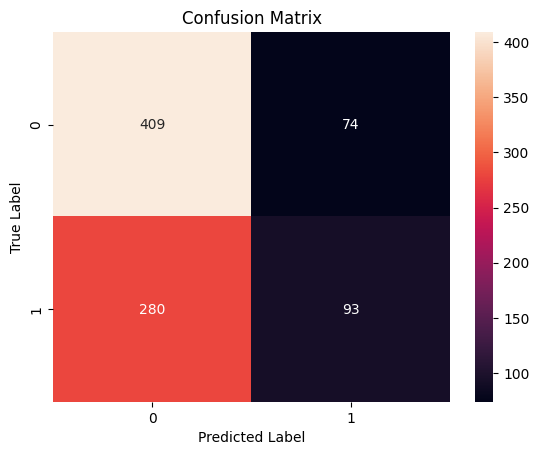

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


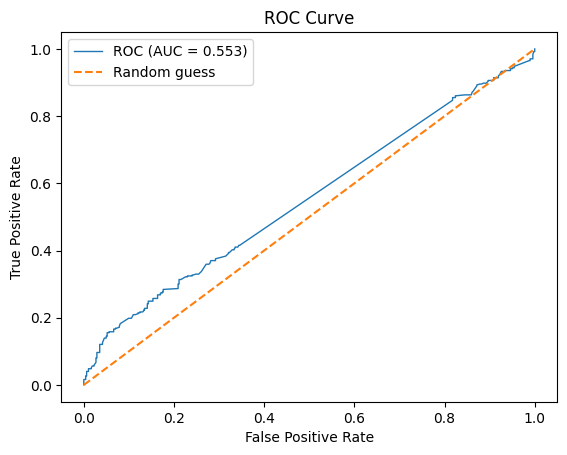

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = gb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label='positive')
roc_auc = roc_auc_score(y_test, y_probs[:, 1])

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


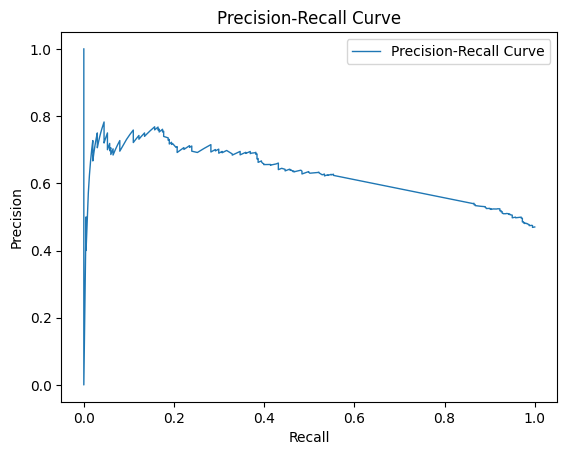

In [57]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1], pos_label='positive')

plt.plot(recall, precision, lw=1, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import classification_report

y_pred = gb.predict(X_test)
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.85      0.70       483
    positive       0.56      0.25      0.34       373

    accuracy                           0.59       856
   macro avg       0.58      0.55      0.52       856
weighted avg       0.58      0.59      0.54       856



In [43]:
#get the feature importance of journalist/author feature
journalist_feature_importance = gb.feature_importances_[-X_journalist.shape[1]:]

# create a dictionary to map the feature index to the journalist/author variable
feature_mapping = {i:col for i,col in enumerate(X_journalist.columns)}

# create a dictionary of feature importance
importance_dict = {feature_mapping[i]:journalist_feature_importance[i] for i in range(len(journalist_feature_importance))}

#sort the feature importance in descending order
sorted_importance = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}

#print the feature importance
print(sorted_importance)


{'David Crow': 0.0017773326550956862, 'Bryce Elder': 0.0007445975808796196, 'Lindsay Whipp': 0.0005705782586877128, 'Henry Sanderson': 0.0004222086461207681, 'Christian Shepherd': 0.000412380082512435, 'Tom Hancock': 0.0003686392644634445, 'Alistair Gray': 0.0003581929001240729, 'Mamta Badkar': 0.0002269175402682786, 'Richard Milne': 0.00022422691201702915, 'David Stevenson': 0.00015026651121672954, 'Robert Cookson': 0.00013890485880761137, 'Neil Buckley': 0.00013300917604520601, 'Anna Nicolaou': 0.00012901813894888224, 'Richard Waters': 9.093445849247824e-05, 'Chris Nuttall': 1.3331842328555266e-05, 'Matthew Rocco': 4.0456979527094395e-06, 'Takeshi Shiraishi': 3.4099667039015404e-06, 'Ben McLannahan': 2.634669524513388e-06, 'Emma Dunkley': 1.2949563728112977e-06, 'Ed Crooks': 6.459759147047814e-07, 'Laura Noonan': 2.892627789681593e-07, 'Dave Lee': 2.757802231409564e-07, 'Guy Chazan': 5.9135099165770365e-08, 'Andrew Ward': 1.0970066964453222e-08, 'Siobhan Riding': 5.160307066483891e-0

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV

# select the top n features based on feature importance scores
n = 15
top_features = [feature for feature, importance in sorted_importance.items() if importance >= sorted(journalist_feature_importance, reverse=True)[n]]

# create a new dataframe with only the top features
X_top_features = X_journalist[top_features]

# concatenate the text and journalist data
X_top_features_matrix = csr_matrix(X_top_features)
X_new = hstack((X_text, X_top_features_matrix))

# split the data into training and test sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# create a new GradientBoostingClassifier object
gb_new = GradientBoostingClassifier()

# fit the new model on the training data
gb_new.fit(X_train_new, y_train)

# evaluate the new model on the test data
accuracy = gb_new.score(X_test_new, y_test)
print("Accuracy of the new model: {:.2f}%".format(accuracy * 100))


Accuracy of the new model: 61.80%


In [45]:

from sklearn.metrics import classification_report
y_pred = gb_new.predict(X_test_new)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.60      0.87      0.71       455
    positive       0.69      0.34      0.45       401

    accuracy                           0.62       856
   macro avg       0.64      0.60      0.58       856
weighted avg       0.64      0.62      0.59       856



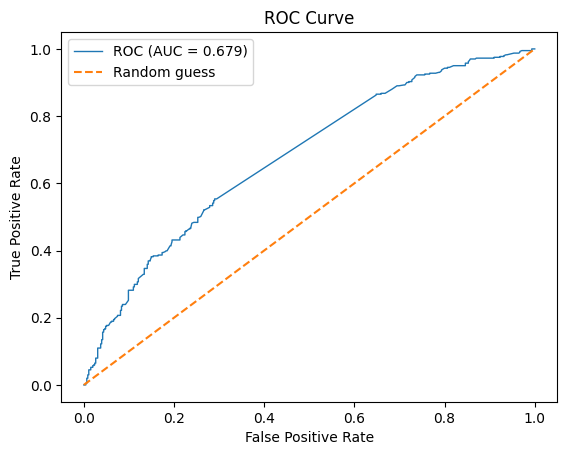

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = gb_new.predict_proba(X_test_new)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label='positive')
roc_auc = roc_auc_score(y_test, y_probs[:, 1])

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


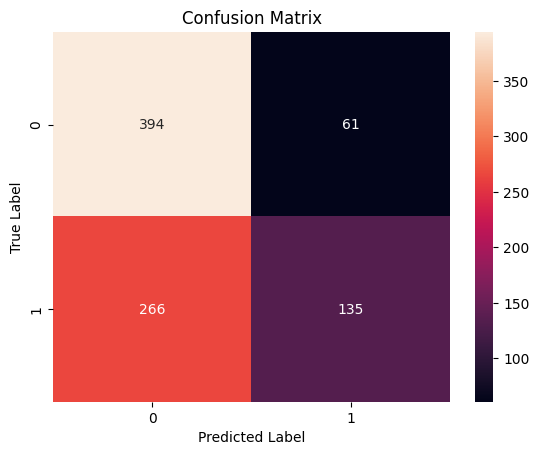

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = gb_new.predict(X_test_new)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


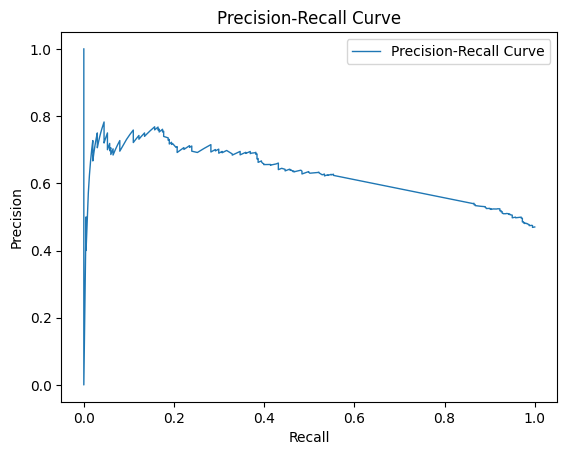

In [58]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1], pos_label='positive')

plt.plot(recall, precision, lw=1, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()